# NLTK Book - Chapter 2

[http://www.nltk.org/book/ch02.html](http://www.nltk.org/book/ch02.html)

The majority of the first part of this chapter is about the many different corpora of work that come with nltk for creating modals. I will do a quick summary and highlight the ways that these are worked with because they are different than what is done in the nltk.book corpus.

## Section 1

The different corpora looked at here are:
* Gutenberg Corpus (nltk.corpus.gutenberg)
  - These are older style books and can be used to train on literature.
* Web and Chat Text (nltk.corpus.webtext)
  - These are a collection of web conversations, many of which coming from the FireFox discussion forum, wine reviews, etc. They represent more conversational language and concepts like jargon.
* Brown Corpus (nltk.corpus.brown)
  - A collection of news and editorial documents and the data is categorized which is helpful if you are writing a classifier. The language comes from the 1960's so the language is a bit dated.
  - Introduced the idea of **stylistics** which is simply a term meaning categorizing information.
* Reuters Corpus (nltk.corpus.reuters)
  - This is another news corpus where the documents have been classified into 90 topics and split into training and test. This is different from brown because the categories overlap. There are over 10700 different files
* Inaugural Address Corpus (nltk.corpus.inaugural)
  - The inaugural addresses of every president up until the 2009 Obama speach. The year is always the first 4 digits of these texts, so you can easily get the year with `[fileid[:4] for fileid in inaugural.fileids()]`

These methods can be called on most corpora to get the data back in a more simple to parse way. However, the specific implementation and additional methods may be available depending upon this corpus. These are specifically defined in reference to the gutenberg corpus.
* `fileids()` is a method on a corpus that shows all of the file names
  - when a string is passed into reuters corpus, you are requesting fileids of the specific category
* `words(fileid)` is a method to return the text in word tokens - the book copora are actually documents tokenized with `words`.
* `raw(fileid)` a method to return the text, but not tokenized
* `sents(fileid)` a method to reutrn the text tokenized into sentences.
* `categories()` is a method on the brown corpus for fetching the different categories. Many of the above methods can use categories=categoryName as keys into their function in place of fileid's. Note that they can be either a single category as a string or a list of categories.

Here is a code sample that uses FreqDist and changes the delimiter for the print function:

In [1]:
import nltk
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals: 
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [2]:
editorials = brown.words(categories='editorial')
fdist = nltk.FreqDist(w.lower() for w in editorials)
questions = ['what', 'when', 'where', 'who', 'why']
for q in questions:
    print(q + ':', fdist[q], end=' ')

what: 113 when: 123 where: 45 who: 177 why: 23 

There is also an interesting frequency distribution known as ConditionalFreqDist which can be used like the following:

In [3]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance' ,'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


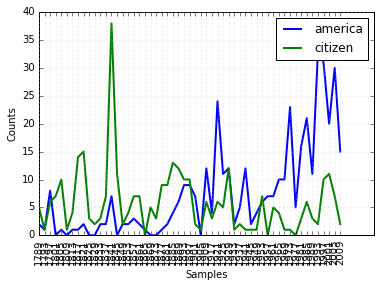

In [4]:
%matplotlib inline
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

There are also annotated text corpora which include linguistic annotations as well as corpora in other languages which each offer different challenges and training opportunities. Here is an example of one document translated into multiple languages: The "Universal Declaration of Human Rights"

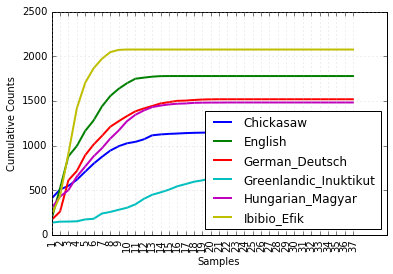

In [5]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)


As can be seen there are multiple types of corpora from categorized (gutenberg, webtext, udhr), overlapping categorized (reuters), isolated (brown), and temporal (inaugural) and they can all provide interesting natural language processing opportunities.

Here is a table of the common methods available on a corpus and what they do:

| Example                     | Description                                               |
|-----------------------------|-----------------------------------------------------------|
| `fileids()`                 | the files of the corpus                                   |
| `fileids([categories])`     | the files of the corpus corresponding to these categories |
| `categories()`              | the categories of the corpus                              |
| `categories([fileids])`     | the categories of the corpus corresponding to these files |
| `raw()`                     | the raw content of the corpus                             |
| `raw(fileids=[f1,f2,f3])`   | the raw content of the specified files                    |
| `raw(categories=[c1,c2])`   | the raw content of the specified categories               |
| `words()`                   | the words of the whole corpus                             |
| `words(fileids=[f1,f2,f3])` | the words of the specified fileids                        |
| `words(categories=[c1,c2])` | the words of the specified categories                     |
| `sents()`                   | the sentences of the whole corpus                         |
| `sents(fileids=[f1,f2,f3])` | the sentences of the specified fileids                    |
| `sents(categories=[c1,c2])` | the sentences of the specified categories                 |
| `abspath(fileid)`           | the location of the given file on disk                    |
| `encoding(fileid)`          | the encoding of the file (if known)                       |
| `open(fileid)`              | open a stream for reading the given corpus file           |
| `root`                      | if the path to the root of locally installed corpus       |
| `readme()`                  | the contents of the README file of the corpus             |

You can also load your own text into a corpus reader like the above by using the `PlaintextCorpusReader` here is an example that access the dict files in linux:

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/usr/share/dict'
wordlist = PlaintextCorpusReader(corpus_root, '.*')
wordlist.fileids()

['README.select-wordlist',
 'american-english',
 'british-english',
 'cracklib-small',
 'words',
 'words.pre-dictionaries-common']

In [7]:
wordlist.words('american-english')

['A', 'A', "'", 's', 'AA', "'", 's', 'AB', "'", 's', ...]

We also have access the the `BracketParseCorpusReader` which will parse several documents matching a file pattern.

# Conditional Frequency Distributions

When a corpa is segmented, we can maintain that segmentation using conditional frequency distributions. Here we are going to disect this code sample that was used without explanation earlier:

In [8]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
)

To begin with, we create tuples of genre and word pairs, this is done by looping over every genre in the list `['news', 'romance']` and then list through all of the words within the corpus that matches that genre. Here is a sample that is just that:

In [9]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
len(genre_word)

170576

You can see that this list puts the news corpa first and the romance second

In [10]:
print(genre_word[:4])
print(genre_word[-4:])

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


When this list is used as a the parameters to `ConditionalFreqDist` it generates an object with two lists that you can see by just printing the variable to which we stored the result

In [11]:
print(cfd)

<ConditionalFreqDist with 2 conditions>


In [12]:
cfd.conditions()

['romance', 'news']

You can access each frequency distribution

In [13]:
print(cfd['news'])
print(cfd['romance'])

<FreqDist with 14394 samples and 100554 outcomes>
<FreqDist with 8452 samples and 70022 outcomes>


In [14]:
cfd['news'].most_common(20)

[('the', 5580),
 (',', 5188),
 ('.', 4030),
 ('of', 2849),
 ('and', 2146),
 ('to', 2116),
 ('a', 1993),
 ('in', 1893),
 ('for', 943),
 ('The', 806),
 ('that', 802),
 ('``', 732),
 ('is', 732),
 ('was', 717),
 ("''", 702),
 ('on', 657),
 ('at', 598),
 ('with', 545),
 ('be', 526),
 ('by', 497)]

In [15]:
cfd['news']['will']

389

So what is the value of having the two frequency distributions bundled in this way? There are some useful methods for tabulation and plotting. Previously in this chapter we plotted two graphs with comparison information. Here they are again:

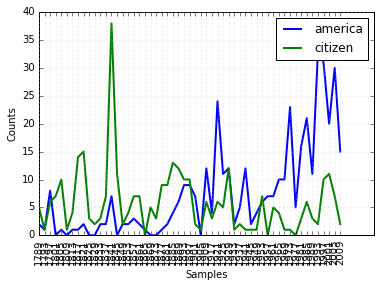

In [16]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

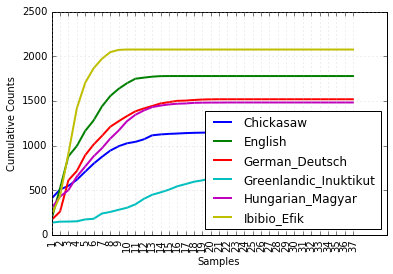

In [17]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

In the `plot()` and `tabulate()` methods we can optionally choose which conditions to show with the `conditions=` parameter. We can also limit it to show only samples with the `samples=` parameter. This gives greater control, not only of the data that is shown, but also the order in which they are shown. Here is an example that limits the language distibution to just two languages and to just words greater than 10 characters long

In [18]:
cfd.tabulate(conditions=['English', 'German_Deutsch'], samples=range(1,10), cumulative=True)

                  1    2    3    4    5    6    7    8    9 
       English  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch  171  263  614  717  894 1013 1110 1213 1275 


Below we chart the conditional frequency of the days of the week to compare news and romance

In [19]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


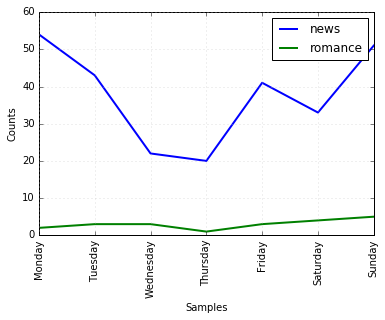

In [20]:
cfd.tabulate(samples=days)
cfd.plot(samples=days)

We can use conditional frequency distibutions to create a table of bigrams, recall this from earlier:

In [21]:
from nltk import bigrams
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

Can we use bigrams and frequency distibutions to generate sentences? It seems likely because we can get the most likely word to follow the current one. Lets try it

In [22]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()
        
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

In [23]:
cfd['living']

FreqDist({',': 1,
          '.': 1,
          'creature': 7,
          'soul': 1,
          'substance': 2,
          'thing': 4})

In [24]:
generate_model(cfd, 'living')

living creature that he said , and the land of the land of the land 

Well, it created a sentence, but it looks like it is prone to get into loops once we hit common word combinations. This is still interesting. Here is a list of the commonly used conditional frequency distribution methods and idioms:

| Example                                | Description                                                          |
|----------------------------------------|----------------------------------------------------------------------|
| `cfdist = ConditionalFreqDist(pairs)`  | create a conditional frequency distribution from a list of pairs     |
| `cfdist.conditions()`                  | the conditions                                                       |
| `cfdist[condition]`                    | the frequency distribution for this condition                        |
| `cfdist[condition][sample]`            | frequency for the given sample for this condition                    |
| `cfdist.tabulate()`                    | tabulate the conditional frequency distribution                      |
| `cfdist.tabulate(samples, conditions)` | tabulation limited to the specified samples and conditions           |
| `cfdist.plot()`                        | graphical plot of the conditional frequency distribution             |
| `cfdist.plot(samples, conditions)`     | graphical plot limited to the specified samples and conditions       |
| `cfdist1 < cfdist2`                    | test if samples in `cfdist1` occur less frequently than in `cfdist2` |